<div class="span5 alert alert-info">
<b>
<h2>    
Predictive Analysis:
</h2>    
</b>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train_join = pd.read_csv("../DataFiles/air_bnb_clean_data/air_bnb_reduced_data.csv")
df_train_join.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age_bucket', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'month_of_first_booking', 'Others', 'action_active',
       'action_ajax_check_dates', 'action_ajax_lwlb_contact',
       'action_ajax_photo_widget_form_iframe', 'action_ajax_refresh_subtotal',
       'action_ask_question', 'action_authenticate',
       'action_calendar_tab_inner2', 'action_campaigns', 'action_click',
       'action_collections', 'action_complete_status', 'action_confirm_email',
       'action_create', 'action_dashboard', 'action_edit',
       'action_edit_verification', 'action_header_userpic', 'action_identity',
       'action_impressions', 'action_index', 'action_listings',
       'action_lookup', 'action_manage_listing', 'action_notifications',
       'action_other_ho

In [4]:
#setting plot style
plt.style.use('ggplot')

<div class="span5 alert alert-info">
<b>    
Feature Selection
</b>    
</div>

**Feature selection based on Mutual information gain**

In [5]:
df_train_join.fillna(9999, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [8]:
#dropping redundant columns
X = df_train_join.drop(['id','date_account_created','timestamp_first_active','date_first_booking','country_destination'],axis=1)
y = df_train_join['country_destination']

X.shape, y.shape

((213451, 75), (213451,))

In [9]:
df_train_join.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age_bucket', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'month_of_first_booking', 'Others', 'action_active',
       'action_ajax_check_dates', 'action_ajax_lwlb_contact',
       'action_ajax_photo_widget_form_iframe', 'action_ajax_refresh_subtotal',
       'action_ask_question', 'action_authenticate',
       'action_calendar_tab_inner2', 'action_campaigns', 'action_click',
       'action_collections', 'action_complete_status', 'action_confirm_email',
       'action_create', 'action_dashboard', 'action_edit',
       'action_edit_verification', 'action_header_userpic', 'action_identity',
       'action_impressions', 'action_index', 'action_listings',
       'action_lookup', 'action_manage_listing', 'action_notifications',
       'action_other_ho

<div class="span5 alert alert-info">
<b>
Create training and test sets
</b>
</div> 

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [11]:
X_train.shape, X_test.shape

((149415, 75), (64036, 75))

**Remove constant quasi constant**

In [12]:
constant_filter = VarianceThreshold(threshold = 0.01)
constant_filter.fit(X_train)

X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

**Removing duplicate features**

In [13]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [14]:
X_train_T = pd.DataFrame(X_train_T) 
X_test_T = pd.DataFrame(X_test_T) 

In [15]:
dupicated_features = X_train_T.duplicated()

In [16]:
print("total duplicate features",dupicated_features.sum())

total duplicate features 3


In [17]:
dup_index = [i for i, val in enumerate(dupicated_features) if val] 
print('duplicate features',X_train.columns[dup_index])

duplicate features Index(['des_lang_CA', 'des_lang_GB', 'des_lang_US'], dtype='object')


In [18]:
features_to_keep = [not index for index in dupicated_features]

In [19]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [20]:
X_train_unique.shape, X_test_unique.shape

((149415, 72), (64036, 72))

**Calculating Mutual Information gains**

In [21]:
mi = mutual_info_classif(X_train_unique, y_train)

In [22]:
len(mi)

72

In [23]:
mi #Higher the number better the mutual information.

array([0.02696108, 0.03925581, 0.0029345 , 0.01184688, 0.01508102,
       0.01095601, 0.01223446, 0.00640086, 0.01929602, 0.01352747,
       0.0113279 , 0.70371409, 0.01194085, 0.01437666, 0.01804193,
       0.01221773, 0.01827184, 0.01295903, 0.01875077, 0.00788092,
       0.01560327, 0.01502935, 0.01568683, 0.01706986, 0.02400084,
       0.00657678, 0.01511266, 0.01210117, 0.01613927, 0.01729788,
       0.01541136, 0.01871285, 0.01667772, 0.00574098, 0.01667734,
       0.01748755, 0.02075218, 0.01616154, 0.01837607, 0.01141396,
       0.01733468, 0.01633879, 0.03233367, 0.01684309, 0.01701733,
       0.00923487, 0.01056508, 0.01573326, 0.01250085, 0.01717955,
       0.01915914, 0.01888099, 0.02499692, 0.01703196, 0.00708498,
       0.00480522, 0.01799836, 0.01575669, 0.01828151, 0.01823325,
       0.01638197, 0.01566781, 0.03897316, 0.04196231, 0.04194467,
       0.03837604, 0.03911146, 0.03848317, 0.0436768 , 0.03833221,
       0.03963669, 0.04110952])

In [24]:
mi = pd.Series(mi)
mi.index = X_train.columns[X_train_unique.columns]

In [25]:
mi.index

Index(['gender', 'age_bucket', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'month_of_first_booking', 'Others', 'action_active',
       'action_ajax_check_dates', 'action_ajax_lwlb_contact',
       'action_ajax_photo_widget_form_iframe', 'action_ajax_refresh_subtotal',
       'action_ask_question', 'action_authenticate',
       'action_calendar_tab_inner2', 'action_campaigns', 'action_click',
       'action_collections', 'action_complete_status', 'action_confirm_email',
       'action_create', 'action_dashboard', 'action_edit',
       'action_edit_verification', 'action_header_userpic', 'action_identity',
       'action_impressions', 'action_index', 'action_listings',
       'action_lookup', 'action_manage_listing', 'action_notifications',
       'action_other_hosting_reviews_first', 'action_personalize',
       'action_qt2', 'action_recommendati

In [26]:
values = mi.sort_values(ascending=True)
values

signup_method              0.002934
des_lang_AU                0.004805
action_index               0.005741
first_affiliate_tracked    0.006401
action_confirm_email       0.006577
                             ...   
age_grp_US                 0.041110
age_grp_DE                 0.041945
age_grp_CA                 0.041962
age_grp_IT                 0.043677
month_of_first_booking     0.703714
Length: 72, dtype: float64

**Plotting features with mutual information gains for classification**

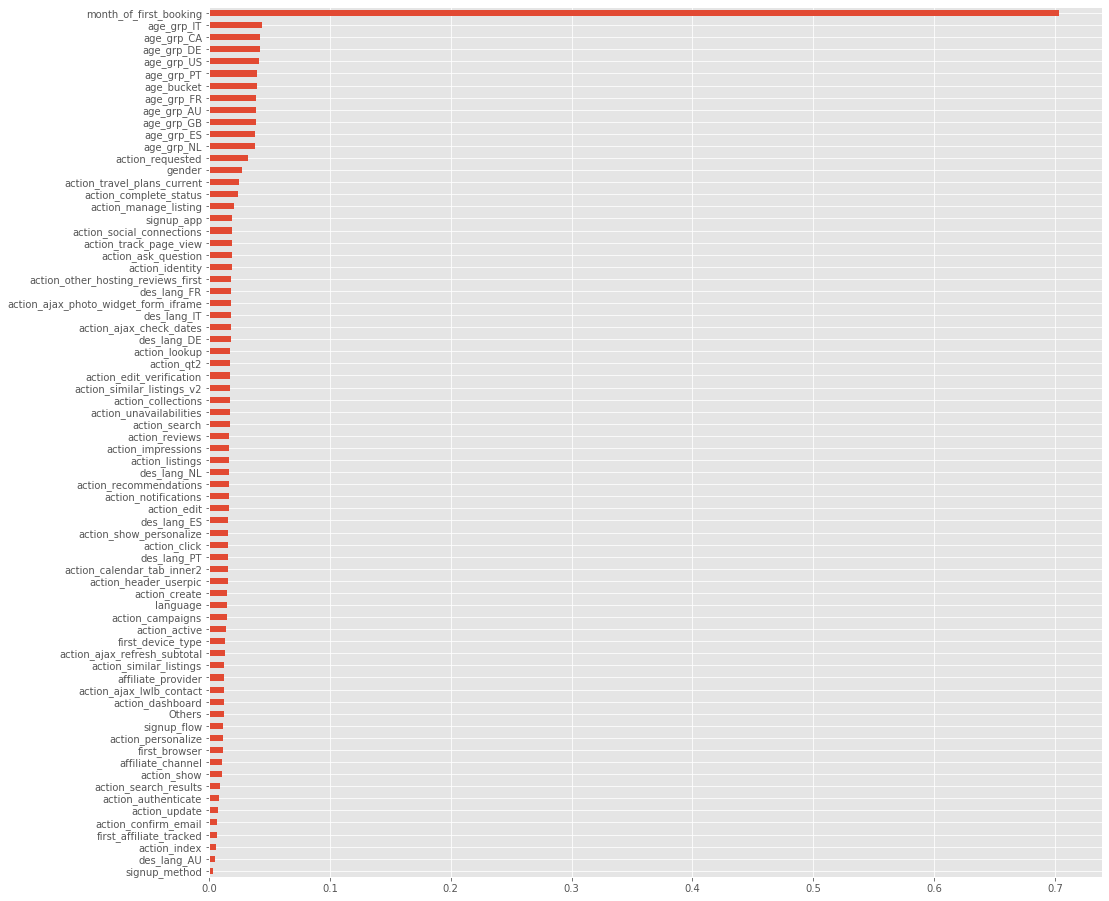

In [27]:
values.plot(kind='barh',figsize=(16,16))

**month_of_first_booking has highest mutual information for classification. This could be because for major NDF i.e for users not doing bookings have month_of_first_booking as NaN as seen in our analysis earlier, which makes it high dependent variable and thus high mutual information.**

**Selecting the best features, setting a threshold of 40 precentile**

In [28]:
sel = SelectPercentile(mutual_info_classif,percentile=40).fit(X_train_unique,y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([ 0,  1,  8, 11, 14, 16, 24, 31, 34, 36, 41, 42, 43, 44, 49, 50, 52,
            58, 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74],
           dtype='int64')

In [29]:
len(X_train_unique.columns[sel.get_support()])

29

**Keeping only these features for further analysis**

In [30]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)

X_train_mi.shape,X_test_mi.shape

((149415, 29), (64036, 29))

****

<div class="span5 alert alert-info">
<b>
Predictive model and performance
</b>
</div>

In [31]:
X_train = X_train_mi #Renaming
X_test = X_test_mi

<div class="span5 alert alert-info">
<b>
RandomForest Classifier
</b>
</div>

In [46]:
clf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 0.8701043163220689


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       162
           1       0.00      0.00      0.00       428
           2       0.00      0.00      0.00       318
           3       0.02      0.00      0.00       675
           4       0.11      0.01      0.01      1507
           5       0.04      0.00      0.01       697
           6       0.04      0.00      0.01       851
           7       1.00      1.00      1.00     37363
           8       0.00      0.00      0.00       229
           9       0.00      0.00      0.00        65
          10       0.70      0.98      0.82     18713
          11       0.14      0.01      0.03      3028

    accuracy                           0.87     64036
   macro avg       0.17      0.17      0.16     64036
weighted avg       0.80      0.87      0.82     64036



In [50]:
def plotComparison(y_test,pred):
    plt.figure(figsize=(18,8))
    plt.subplot(1, 2, 1)
    cat_counts = y_test.value_counts()
    cat_counts.plot.bar(title="Test data classification")
    plt.xlabel("test destination countries")
    
    plt.subplot(1, 2, 2)
    cat_counts = pd.Series(pred).value_counts()
    cat_counts.plot.bar(title="Predicted data classification")
    plt.xlabel("predicted destination countries")

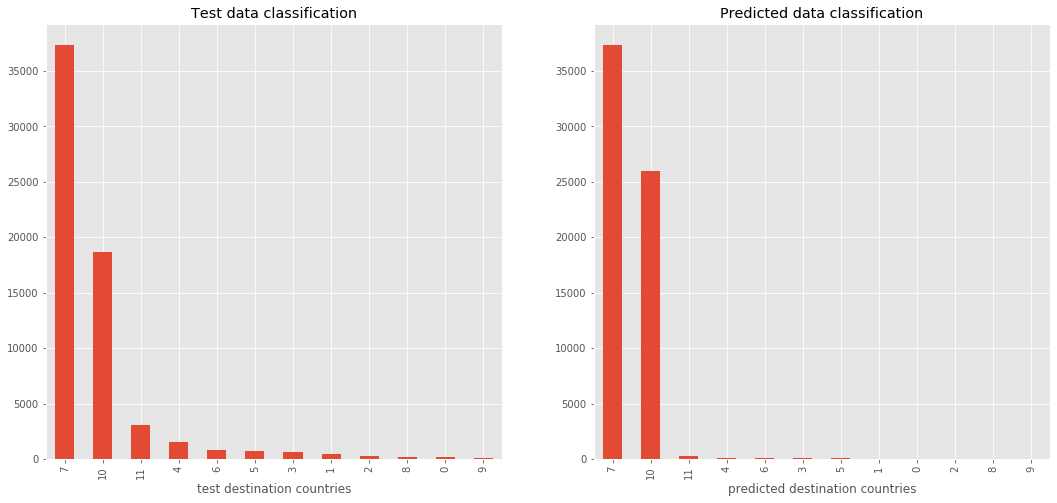

In [51]:
plotComparison(y_test,y_pred)

**From the above plot and with reference to the classification report we see that, class 7(NDF) is very well predicted with precision of 1.**

**Class 10(US) has been predicted with a precision of 0.7,this class is a bit overclassified.**

**The model is capable of predicting some minor classes like class 11, 4, 6, 3, 5 with relatively lower precision.**

**Overall the model gives a test accuracy of 0.870.**

<div>
<b>    
<i>
<u>    
NOTE:
</u>    
</i>
</b>    
</div>

**From our the previous analysis we have seen that the dataset is imbalanced with class 7(NDF) and 10(US).** 

**We are not handling this imbalance as we want our model to learn the bias and try to classify the minor classes taking this into account.**    

<div class="span5 alert alert-info">
<b>
Hyper parameter tuning
</b>
</div>

<div class="span5 alert alert-info">
<b>
RandomSearchCV
</b>
</div>

In [38]:
print(clf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [39]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [41]:
print(rf_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [42]:
best_random = rf_random.best_estimator_

In [43]:
best_random.fit(X_train,y_train)
y_pred = best_random.predict(X_test)

print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 0.8756949216065963


**After hyperparameter tunning we get a slightly higher test accuracy score of 0.875.**

****

<div class="span5 alert alert-info">
<b>
Neural Networks
</b>
</div>

In [95]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

**Base model using SGD optimiser**

In [96]:
# Convert the target to categorical: target
target_class = 12 #total class categories to predict

#Setting predictors and target
target = to_categorical(y_train)
predictors = X_train

#input nodes based on number of features
n_cols = predictors.shape[1]

In [105]:
#Set up the model
model_bSGD = Sequential() #base model using SGD optimiser

# Add the first layer
model_bSGD.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model_bSGD.add(Dense(target_class, activation='softmax'))

# Compile the model
model_bSGD.compile(optimizer='SGD', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

# Fit the model
model_bSGD.fit(predictors, target, epochs = 10)

Epoch 1/10
149415/149415 [==============================] - 10s 69us/step - loss: 2753904.7863 - accuracy: 0.5833
Epoch 2/10
149415/149415 [==============================] - 10s 67us/step - loss: 1.1734 - accuracy: 0.5835
Epoch 3/10
149415/149415 [==============================] - 10s 66us/step - loss: 1.1679 - accuracy: 0.5835
Epoch 4/10
149415/149415 [==============================] - 10s 67us/step - loss: 1.1659 - accuracy: 0.5835
Epoch 5/10
149415/149415 [==============================] - 10s 67us/step - loss: 1.1650 - accuracy: 0.5835
Epoch 6/10
149415/149415 [==============================] - 10s 68us/step - loss: 1.1644 - accuracy: 0.5835
Epoch 7/10
149415/149415 [==============================] - 10s 68us/step - loss: 1.1641 - accuracy: 0.5835
Epoch 8/10
149415/149415 [==============================] - 10s 69us/step - loss: 1.1638 - accuracy: 0.5835
Epoch 9/10
149415/149415 [==============================] - 10s 69us/step - loss: 1.1637 - accuracy: 0.5835
Epoch 10/10
149415/149

In [98]:
#Calculate predictions: predictions
predictions = model_bSGD.predict_classes(X_test)

pd.Series(predictions).value_counts()#predicted classes and counts

7    64036
dtype: int64

In [99]:
print("accuracy_score",accuracy_score(y_test,predictions))

accuracy_score 0.5834686738709476


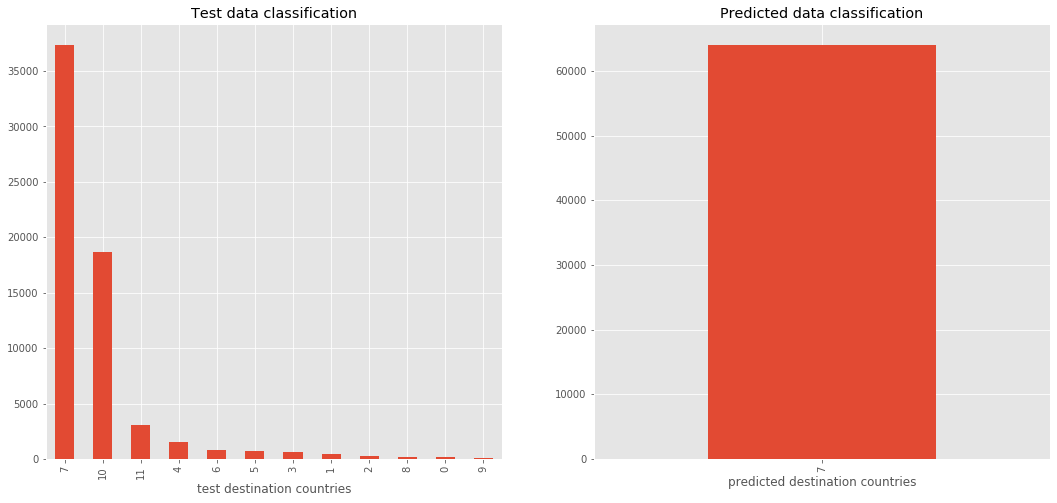

In [100]:
plotComparison(y_test,predictions)

**From the above plot, we see the model with SGD optimiser predicts just major classes 7(NDF) of all the class with a test accuracy = 0.583**

****

**Base model using ADAM optimiser**

In [101]:
#Set up the model
model_bAdam = Sequential() #base model using Adam optimiser

# Add the first layer
model_bAdam.add(Dense(100, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model_bAdam.add(Dense(target_class, activation='softmax'))

# Compile the model
model_bAdam.compile(optimizer='Adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

# Fit the model
model_bAdam.fit(predictors, target, epochs = 15)

Epoch 1/15
149415/149415 [==============================] - 13s 86us/step - loss: 134.1509 - accuracy: 0.7925
Epoch 2/15
149415/149415 [==============================] - 12s 81us/step - loss: 52.3437 - accuracy: 0.7962
Epoch 3/15
149415/149415 [==============================] - 12s 80us/step - loss: 21.7855 - accuracy: 0.8352
Epoch 4/15
149415/149415 [==============================] - 12s 80us/step - loss: 7.1079 - accuracy: 0.8739
Epoch 5/15
149415/149415 [==============================] - 12s 80us/step - loss: 4.0761 - accuracy: 0.8745
Epoch 6/15
149415/149415 [==============================] - 12s 81us/step - loss: 2.2023 - accuracy: 0.8749
Epoch 7/15
149415/149415 [==============================] - 12s 81us/step - loss: 1.5789 - accuracy: 0.8749
Epoch 8/15
149415/149415 [==============================] - 12s 82us/step - loss: 1.0089 - accuracy: 0.8751
Epoch 9/15
149415/149415 [==============================] - 12s 82us/step - loss: 1.4225 - accuracy: 0.8749
Epoch 10/15
149415/14941

In [102]:
#Calculate predictions: predictions
predictions = model_bAdam.predict_classes(X_test)

pd.Series(predictions).value_counts()

7     37338
10    26697
2         1
dtype: int64

In [103]:
print("accuracy_score",accuracy_score(y_test,predictions))

accuracy_score 0.8752420513461178


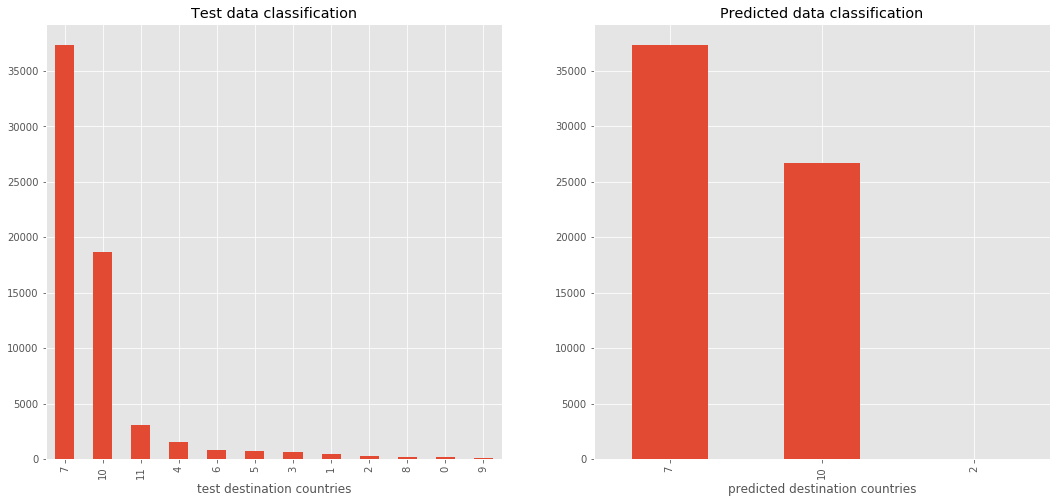

In [104]:
plotComparison(y_test,predictions)

**From the above plot see the model with Adam optimiser predicts just two major class 7(NDF), 10(US) and some rare classes with a test accuracy = 0.875**

**Parameter optimisation on Learning rate, epoch, nodes, layers, EarlyStopping, ModelCheckpoint and Cross validation**

In [89]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

early_stopping_monitor = EarlyStopping(patience=2)

my_opt = Adam(learning_rate=0.0001)

model_ = Sequential()

model_.add(Dense(140, activation='relu', input_shape=(n_cols,)))
model_.add(Dense(100, activation='relu'))

model_.add(Dense(target_class, activation='softmax'))

model_.compile(optimizer = my_opt, loss='categorical_crossentropy',metrics=['accuracy'])


# checkpoint for best wieights
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,early_stopping_monitor]


model_.fit(predictors, target, epochs=30, validation_split=0.3,callbacks=callbacks_list)

Train on 104590 samples, validate on 44825 samples
Epoch 1/30
104590/104590 [==============================] - 14s 133us/step - loss: 94.9261 - accuracy: 0.7806 - val_loss: 31.8655 - val_accuracy: 0.8493

Epoch 00001: val_accuracy improved from -inf to 0.84928, saving model to weights.best.hdf5
Epoch 2/30
104590/104590 [==============================] - 13s 125us/step - loss: 29.0498 - accuracy: 0.7953 - val_loss: 26.5641 - val_accuracy: 0.8390

Epoch 00002: val_accuracy did not improve from 0.84928
Epoch 3/30
104590/104590 [==============================] - 14s 133us/step - loss: 23.4872 - accuracy: 0.7969 - val_loss: 27.1536 - val_accuracy: 0.6411

Epoch 00003: val_accuracy did not improve from 0.84928
Epoch 4/30
104590/104590 [==============================] - 13s 127us/step - loss: 20.0196 - accuracy: 0.7958 - val_loss: 16.9389 - val_accuracy: 0.8580

Epoch 00004: val_accuracy improved from 0.84928 to 0.85800, saving model to weights.best.hdf5
Epoch 5/30
104590/104590 [============

In [90]:
#loading weights in the model and compile
model_.load_weights("weights.best.hdf5")
model_.compile(optimizer = my_opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [91]:
#Calculate predictions: predictions
predictions = model_.predict_classes(X_test) #predicting classes
pd.Series(predictions).value_counts()

7     37349
10    25975
4       148
11      140
6       109
2        83
1        69
5        47
3        47
8        44
9        15
0        10
dtype: int64

In [92]:
print("accuracy_score",accuracy_score(y_test,predictions))

accuracy_score 0.8681366731213692


In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       162
           1       0.00      0.00      0.00       428
           2       0.00      0.00      0.00       318
           3       0.02      0.00      0.00       675
           4       0.05      0.01      0.01      1507
           5       0.00      0.00      0.00       697
           6       0.05      0.01      0.01       851
           7       1.00      1.00      1.00     37363
           8       0.02      0.00      0.01       229
           9       0.00      0.00      0.00        65
          10       0.70      0.97      0.82     18713
          11       0.14      0.01      0.01      3028

    accuracy                           0.87     64036
   macro avg       0.17      0.17      0.15     64036
weighted avg       0.80      0.87      0.82     64036



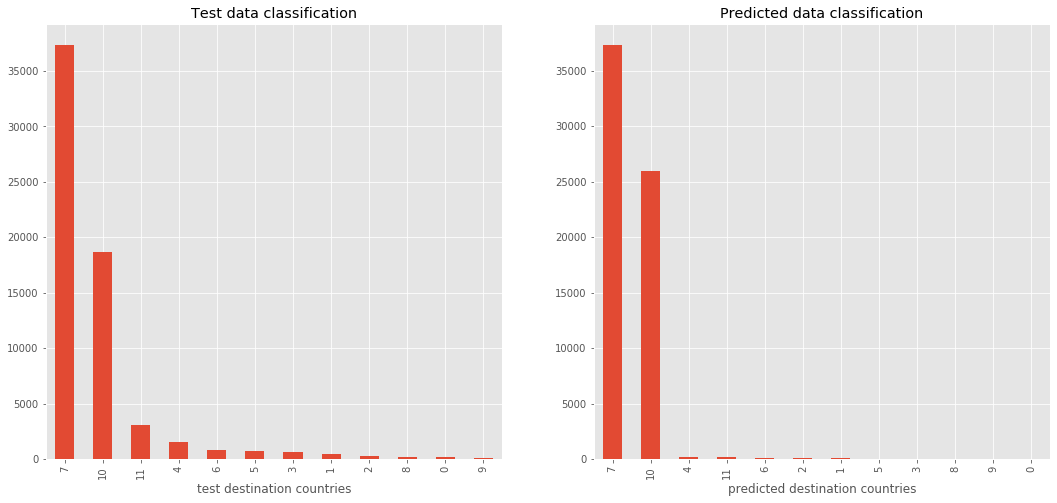

In [94]:
plotComparison(y_test,predictions)

**From the above plot see the model with Adam optimiser and parameter tuning predicts the major class 7(NDF) with precision of 1.**

**Class 10(US) has been predicted with a precision of 0.70, this class is a bit overclassified.**

**The model is capable of predicting some minor classes like class 1,2, 4, 5, 6, 8 and 11 with relatively lower precision.**

**Overall the model gives a validation accuracy of 0.868.**

<div class="span5 alert alert-info">
<b>
Insights from model analysis:
</b>
</div>

**1. month_of_first_booking is the most important feature having a high mutual information value.**

**2. Randomforest Classifier gives a validation accuracy score of 0.875 after hyperparameter tuning, predicting mostly the major classes and some rare classes.**

**3. Neural network Classifier with Adam optimiser and parameter tuning predicts some of the rare classes with validation accuracy of 0.868.**